In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# auto reload
%load_ext autoreload
%autoreload 2


/Users/vg/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load data from  fin_dataset_africa copy.csv

data = pd.read_csv('fin_dataset_africa copy.csv', delimiter=';')

In [3]:
print(data.columns)

# print types

# convert all values from column 2 and on to numeric
data[data.columns[2:]] = data[data.columns[2:]].apply(pd.to_numeric, errors='coerce')

print(data.dtypes)

# convert nans to mean
data.fillna(data.mean(), inplace=True)

# convert .. to mean
data = data.replace('..', np.nan)

Index(['Country_Name', 'Year', 'Government_Debt_(Percent_of_GDP)',
       'Foreign_direct_investment_net_inflows_(Percent_of_GDP)',
       'GDP_per_capita_growth_(annual_Percent)',
       'Gross_capital_formation_(Percent_of_GDP)',
       'Gross_national_expenditure_(Percent_of_GDP)',
       'Net_barter_terms_of_trade_index_(2015_=_100)',
       'Population_growth_(annual_Percent)', 'Trade_(Percent_of_GDP)'],
      dtype='object')
Country_Name                                               object
Year                                                        int64
Government_Debt_(Percent_of_GDP)                          float64
Foreign_direct_investment_net_inflows_(Percent_of_GDP)    float64
GDP_per_capita_growth_(annual_Percent)                    float64
Gross_capital_formation_(Percent_of_GDP)                  float64
Gross_national_expenditure_(Percent_of_GDP)               float64
Net_barter_terms_of_trade_index_(2015_=_100)              float64
Population_growth_(annual_Percent)   

/var/folders/zn/8wl2ftxd7sg0pjvzvx59s5xr0000gn/T/ipykernel_19450/4219909817.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [4]:
# get mean for each of the countries in the dataset
mean_debt = data.groupby('Country_Name')['Government_Debt_(Percent_of_GDP)'].mean()
mean_gdp = data.groupby('Country_Name')['GDP_per_capita_growth_(annual_Percent)'].mean()

/var/folders/zn/8wl2ftxd7sg0pjvzvx59s5xr0000gn/T/ipykernel_19450/3336787754.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(mean_debt, results.fittedvalues, 'r', color ='blue')


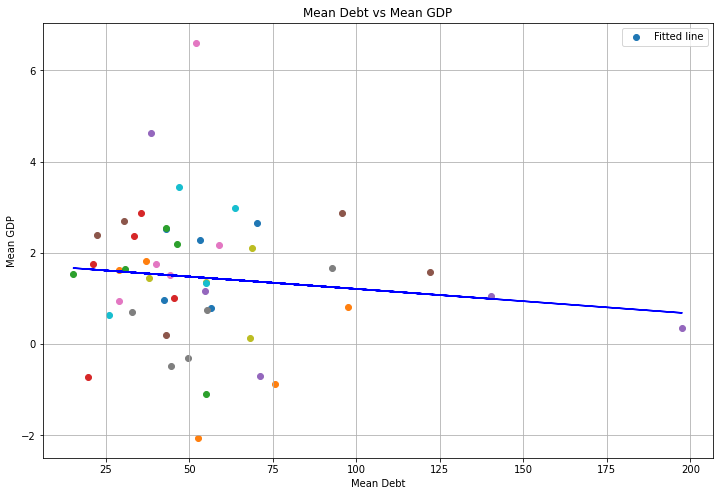

In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ... (assuming you have mean_debt and mean_gdp calculated)

plt.figure(figsize=(12, 8))

# Either extract elements:
for i in range(len(mean_debt)):
    plt.scatter(mean_debt[i], mean_gdp[i])

# ... Or convert to lists:
# plt.scatter(mean_debt.tolist(), mean_gdp.tolist())

# add a line of best fit
X = sm.add_constant(mean_debt)
model = sm.OLS(mean_gdp, X, missing='drop')
results = model.fit()
plt.plot(mean_debt, results.fittedvalues, 'r', color ='blue')

# make plot pretty
plt.grid()
plt.legend(['Fitted line'])

# make plot bigger

plt.xlabel('Mean Debt')
plt.ylabel('Mean GDP')
plt.title('Mean Debt vs Mean GDP')
plt.show()



In [6]:
# make mean_debt and mean_gdp into a latrex table together

mean_debt = mean_debt.reset_index()
mean_gdp = mean_gdp.reset_index()

mean_debt_gdp = pd.merge(mean_debt, mean_gdp, on='Country_Name')

# make country name the index
mean_debt_gdp.set_index('Country_Name', inplace=True)

mean_debt_gdp.to_latex('mean_debt_gdp.tex')




/var/folders/zn/8wl2ftxd7sg0pjvzvx59s5xr0000gn/T/ipykernel_19450/139042300.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  mean_debt_gdp.to_latex('mean_debt_gdp.tex')
